### 1.1
What is the value of $\sqrt{2}^{\sqrt{2}^{{\sqrt{2}^{...}}}}$?

In [48]:
import math
exponent = 1
for n in range(0, 100):
    exponent = math.sqrt(2)**exponent ## Pay attention to this!
print(exponent)

##2

2.0000000000000004


### 3.1
You have a bag with two coins. One will come up heads 40% of the time, and the other will come up heads 60%. You pick a coin randomly, flip it and get a head. What is the probability it will be heads on the next flip?

In [49]:
import random
class Coin(object):  ## Create a class
    def __init__(self, p):
        self.prob = p
        
    def flip_is_head(self):  ## Boolean
        return random.random() < self.prob
    
    def __repr__(self):  ## An easier way to represent
        return 'Coin with p =' +str(self.prob)

class Bag_of_coins(object):
    def __init__(self):
        self.coins = []  ## So self.prob & self.coins don't truly matter.
        
    def add_coins(self, coin):
        self.coins.append(coin)
        
    def pick_random_coin(self):
        return random.choice(self.coins)
        
x = Coin(0.6)
x.__repr__()
print(x)
bag = Bag_of_coins()
bag.add_coins(Coin(0.4))
bag.add_coins(Coin(0.6))


num_trials = 1000
trial_ctr =0
head_ctr = 0
while trial_ctr < num_trials:
    coin = bag.pick_random_coin()
    if coin.flip_is_head():
        trial_ctr +=1
        if coin.flip_is_head():
            head_ctr +=1
head_ctr/trial_ctr

## ????We get the answer 0.5???

Coin with p =0.6


0.502

### 3.5
Starting at one vertex of a cube, and moving randomly from vertex to adjacent vertices, what is the expected number of moves until you reach the  vertex opposite from your starting point?

In [52]:
from random import randint

def sumWorkaround(vertex):
    sum_ = 0
    for coordinate in vertex:
        sum_ += coordinate
    return sum_

def number_of_moves(dimension):
    # return the number of moves needed for
    # As it's a cube, dimension = 3
    move_count = 0
    vertex = [0] * dimension
    while sum(vertex) < dimension:
        axis_choice = randint(0, dimension - 1)   ###################???随便选一个点？
#         if vertex(axis_choice) == 0:
#             vertex(axis_choice) == 1
#         else:
#             vertex(axis_choice) == 0
        vertex[axis_choice] = 1 - vertex[axis_choice]
        move_count += 1
    return move_count

number_of_trials = 10000
trials = [number_of_moves(3) for i in range(number_of_trials)]
# initialize dictionary to count frequency of number of moves
number_moves_count = {trial:0 for trial in trials}
for trial in trials:
    number_moves_count[trial] += 1    
number_moves_count

####################################### 众数？ 平均数？

{3: 2194,
 5: 1672,
 7: 1379,
 9: 1109,
 11: 803,
 13: 652,
 15: 504,
 17: 355,
 19: 298,
 21: 244,
 23: 174,
 25: 140,
 27: 118,
 29: 68,
 31: 67,
 33: 46,
 35: 41,
 37: 22,
 39: 26,
 41: 24,
 43: 19,
 45: 10,
 47: 7,
 49: 6,
 51: 3,
 53: 4,
 55: 5,
 57: 2,
 59: 2,
 63: 1,
 65: 1,
 69: 1,
 75: 1,
 83: 1,
 87: 1}

### 3.8
You have a spinner that generates random numbers that are uniform between 0 and 1. You sum the spins until the sum is greater than one. What is the expected number of spins?

In [4]:
# Method I

#%pylab inline
import random
import numpy
#import matplotlib.pyplot as pit

num_trials = 10
trials = []

def simulate_number_of_spins_to_exceed_one():
    sum_ = 0
    count = 0
    while sum_ <= 1:
        sum_ += random.random()
        count += 1
    return count

trials=[simulate_number_of_spins_to_exceed_one() for _ in range(num_trials)]
# trials

## What's the later two sentences for?
#num_bins = np.max(trials) - np.min(trials) + 1
#pit.hist(trials.bins=num_bins, normed=True, aliqn="left", rwidth=0.3, range=(2,2+num_bin))
numpy.mean(trials)
# end up with a list of the number of spins on each trial

# The answer should be around e.

2.2000000000000002

In [11]:
# Method II

import random
import numpy

c=0
num_trials = 1000
trials = []
i = 1
for _ in range(num_trials):  ## What does this mean?
    x = random.uniform(0,1)
    c += x
    if c > 1:
        trials.append(i)  ## Pay attention to this!
        i=1
        c=0
    else:
        i+=1
print(trials)
numpy.mean(trials)


[3, 2, 2, 2, 2, 2, 3, 3, 3, 4, 3, 2, 4, 2, 3, 2, 2, 2, 2, 4, 2, 3, 2, 2, 4, 3, 2, 5, 2, 2, 2, 2, 3, 2, 2, 4, 3, 2, 4, 2, 2, 2, 2, 4, 5, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 4, 2, 3, 5, 2, 2, 2, 5, 3, 4, 4, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 4, 3, 2, 2, 4, 5, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3, 3, 3, 2, 2, 2, 4, 2, 4, 2, 3, 3, 2, 2, 2, 5, 3, 3, 3, 3, 2, 2, 2, 2, 2, 4, 3, 2, 2, 4, 2, 3, 3, 2, 2, 4, 3, 3, 4, 3, 2, 2, 4, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 4, 2, 2, 3, 2, 3, 3, 6, 3, 2, 2, 2, 3, 3, 4, 2, 2, 2, 2, 5, 3, 2, 2, 5, 3, 3, 3, 5, 2, 2, 3, 5, 2, 2, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 6, 2, 3, 3, 2, 2, 5, 2, 2, 2, 3, 3, 3, 3, 4, 2, 2, 3, 2, 3, 2, 4, 3, 2, 4, 2, 4, 4, 2, 3, 3, 2, 4, 3, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 4, 5, 3, 2, 2, 2, 3, 3, 2, 3, 4, 2, 3, 2, 3, 2, 2, 2, 4, 2, 2, 5, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 4, 3, 2, 4, 3, 2, 3, 5, 2, 4, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 5, 4, 3, 2, 3, 3, 5, 3, 4, 2, 4, 3, 

2.7369863013698632

### 3.10
A stick is broken randomly into 3 pieces. What is the probability of the pieces being able to form a triangle?

### 3.11
A stick is broken randomly into two pieces. The larger piece is then broken randomly into two pieces. What is the probability of the pieces being able to form a triangle?

# 3.13
This is based on a Goldman Sachs interview question. You play a game where you toss two fair coins in the air. You always win $1. However, if you have tossed 2 heads at least once, and 2 tails at least once, you surrender all winnings, and cannot play again. You may stop playing at anytime. What’s your strategy?

Populating the interactive namespace from numpy and matplotlib


2.411

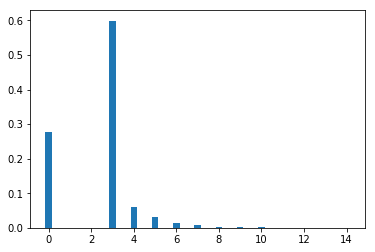

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

class TwoDiceGame(object):
    def play(self):
        winnings = 0
        two_of_same_seen = False
        while True: ## It can be any true sentence.
            if two_of_same_seen:
                if winnings >= 3:
                    # our strategy: quit if we have 3+ in this case 
                    return winnings
                if np.random.randint(4) == 0:
                    # bad luck: both HH and TT seen, lost it all
                    return 0
            else:
                two_of_same_seen = np.random.randint(2) == 0
            winnings += 1
    
game = TwoDiceGame()
num_trials = 10000
trials = [game.play() for _ in range(num_trials)]
num_bins = np.max(trials) - np.min(trials) + 1
plt.hist(trials, bins = num_bins, normed = True, 
         align = 'left', rwidth=0.3, range = (0, num_bins))

np.mean(trials)

### 5.2
You have a basket of $n$ assets. The asset returns are multivariate normal with zero mean. Correlation between any pair of assets is 1/2. What is the probability that $k$ of the assets will have positive return?